# Modelando la Pandemia

  En este proyecto vamos a estudiar y analizar los datos mundiales de la pandemia COVID-19 usando países modelo de distintas políticas públicas para luego interpretar otras curvas.

Puedes descargar el dataset de casos totales, divididos por país [aquí.](
https://ourworldindata.org/coronavirus-data?country=
) Descarga los datos  formato .csv luego podrás cargarlos en el notebook usando pandas, a partir de eso selecciona los de los países que te interesan, hay un ejemplo de cómo se hace esto en este notebook. 

# ¿Cómo empezó la pandemia?


  La primer parte del trabajo consiste en estudiar cómo se empieza a propagar la pandemia, luego analizaremos las medidas tomadas y su efectividad.

  Al inicio de una pandemia, se estima que los contagios siguen una ley exponencial, esa es la fase de "crecimiento exponencial", luego hay un decaimiento dado por la inmunidad. 

  Los datos de casos confirmados en función del tiempo $C(t)$, pueden aproximarse con el modelo

$C(t)=e^{k(t-t_0)}$

donde $t_0$ es la fecha del primer contagio, y $k$ es un parámetro propio de cada enfermedad, que habla de la contagiosidad. Cuanto mayor es $k$, más grande será el número de casos confirmados dado por la expresión. $k$ depende de el tiempo que una persona enferma contagia, el nivel de infecciosidad del virus y cuántas personas que se pueden contagiar ve una persona enferma por día. Es decir, la circulación. Haciendo cuarententa, $k$ disminuye, con la circulación $k$ aumenta.

  El parámetro $k$ está directamente relacionado con el $R$ del que tanto se habla en los medios. En este proyecto haremos foco en $k$, pero puedes profundizar sobre esto si quieres, empezandó por [aquí](https://es.wikipedia.org/wiki/Ritmo_reproductivo_b%C3%A1sico). 

  Es posible hacer un modelo completo, pero para eso es necesario utilizar ecuaciones diferenciales. Si quieres profundizar sobre eso, busca información sobre "modelo epidemiológico SEIR". Si quieres ver cómo funciona este modelo, puedes empezar por [aquí](http://gabgoh.github.io/COVID/index.html). En ese link está implementado el modelo SEIR (no es necesario entender las ecuaciones en este caso) y el rol que cumplen los parámetros, puedes explorar el impacto de variar $R$ y el resto de los valores para ver cómo impactan en la cirva de contagios. Ahora utilizaremos la siguiente expresión para describir únicamente la etapa de crecimiento exponencial.


  Comienza estudiando cómo se distribuyó el $k$ inicial de la pandemia y si es posible elaborar un intervalo de confianza razonable para este valor. Para eso 
  
  1. Elegir diez países del norte (ahí empezó la pandemia) y puedes mide el valor de $k$ inicial de la pandemia, analizando datos del primer tramo.

  2. Analiza si es posible estimar la evolución mundial de la pandemia a partir de lo que obtuviste. Para esto, puedes elaborar un intervalo de confianza para $k$ a partir de los que obtuviste y así generar un modelo nuevo, basado en la distribución de $k$. Luego compara el modelo con los datos mundiales.

3. Piensa qué significa que el modelo de "bien" o dé "mal" ¿qué indicadores de esto existen?. Luego discute en el informe por qué crees que dio así. Recuerda que es importante elegir bien la población de muestra. Piensa qué criterios puedes elegir para representar bien la población mundial que se contagió al inicio de la pandemia.
 
 # Evaluando estrategias

 Ahora que tienes una manera de obtener información de las curvas, puedes intentar evaluar las estrategias de acción y el comportamiento de las poblaciones, construyendo un clasificador binario. 
1. Elige una categoría binaria que hable de políticas públicas elegidas por los países para enfrentar la pandemia que te interese estudiar, como pueden ser "la población hizo cuarententa" o "la población se vacunó".
2. Piensa qué indicadores de la curva pueden hablar del éxito de la política que quieres estudiar. Por ejemplo, si se tratase de evaluar el éxito de una cuarentena podría ser porcentaje de población  que se contagió o variación del valor de $k$ a partir de que se empezó a implementar esa medida. Elige al menos 3 indicadores.
3. Investiga sobre países que hayan aplicado o no esa política pública, para generar una base de datos. Por ejemplo, Brasil no hizo cuarentena y China hizo una muy estricta. Recuerda hacer una selección inteligente de la porción de datos de la curva de cada país que vas a analizar.
4. Construye un clasificador binario a partir de una regresión logística o usando Naive Bayes para intentar analizar la estrategia de otros países y ver si es posible predecirla a partir de la curva de contagios y el clasificador. Un posible clasificador binario es uno que clasifique el porcentaje de contagios en función da las categorías "la población hizo cuarentena" y "la población n hizo cuarentena". Haz esto para los 3 indicadores que elegiste en el punto 3 y compara los resultados.
5. Elabora un informe con lo que hayas aprendido a lo largo de este proyecto, donde discutas la utilidad o no de los indicadores que elegiste y del análisis estadístico propuesto.

#¡Comencemos!

  A continuación dejamos un ejemplo de cómo extraer el $k$ inicial de Argentina, usando un ajuste de cuadrados mínimos. Si necesitas los datos mundiales, en la columna de países aparecen como "World".



In [34]:
#!pip install Numpy
#!pip install Pandas
#!pip install matplotlib
#!pip install scipy
#!pip install Pillow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from jupyterthemes import jtplot
import os
from scipy.optimize import curve_fit
#from google.colab import drive
#from scipy.optimize import curve_fit

# Estilo del gráfico segun el thema
jtplot.style(#'chesterish'
             #'grade3'
             #'gruvboxd'
             #'gruvboxl'
             #'monokai'
             #'oceans16'
             #'onedork'
             'solarizedd'
             #'solarizedl'
            )

In [ ]:
# cargamos los datos para drive

#drive.mount('/content/gdrive', force_remount=True)

# Aca deben apuntar a la carpeta de su drive donde guardaron los datos
#root_dir = "/content/gdrive/My Drive/datos_acamica"


In [2]:
os.listdir('data')

['contagios_covid_data.csv']

In [3]:
datos=pd.read_csv('data/contagios_covid_data.csv')
datos

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165403,ZWE,Africa,Zimbabwe,2022-02-25,235467.0,500.0,348.143,5392.0,2.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165404,ZWE,Africa,Zimbabwe,2022-02-26,235803.0,336.0,368.429,5393.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165405,ZWE,Africa,Zimbabwe,2022-02-27,235803.0,0.0,350.143,5393.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165406,ZWE,Africa,Zimbabwe,2022-02-28,236380.0,577.0,401.286,5395.0,2.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [4]:
datos.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165408 entries, 0 to 165407
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    165408 non-null  object 
 1   continent                                   155504 non-null  object 
 2   location                                    165408 non-null  object 
 3   date                                        165408 non-null  object 
 4   total_cases                                 162378 non-null  float64
 5   new_cases                                   162230 non-null  float64
 6   new_cases_smoothed                          160247 non-null  float64
 7   total_deaths                                144574 non-null  float64
 8   new_deaths                                  144611 non-null  float64
 9   new_deaths_smoothed                         142515 non-null  float64
 

# Por paises

In [15]:
df_arg = datos[datos.location == 'Argentina']
df_arg.shape

(791, 67)

In [16]:
# Primer caso no nulo index
df_arg.total_cases.isnull().idxmin()-df_arg.iloc[0].name

62

In [6]:
paises=datos['location'] #cargo el vector de paises
confirmados=datos['total_cases'] #carga vector todos los casos confirmados

## China

Text(0.5, 0.98, 'Casos Totales')

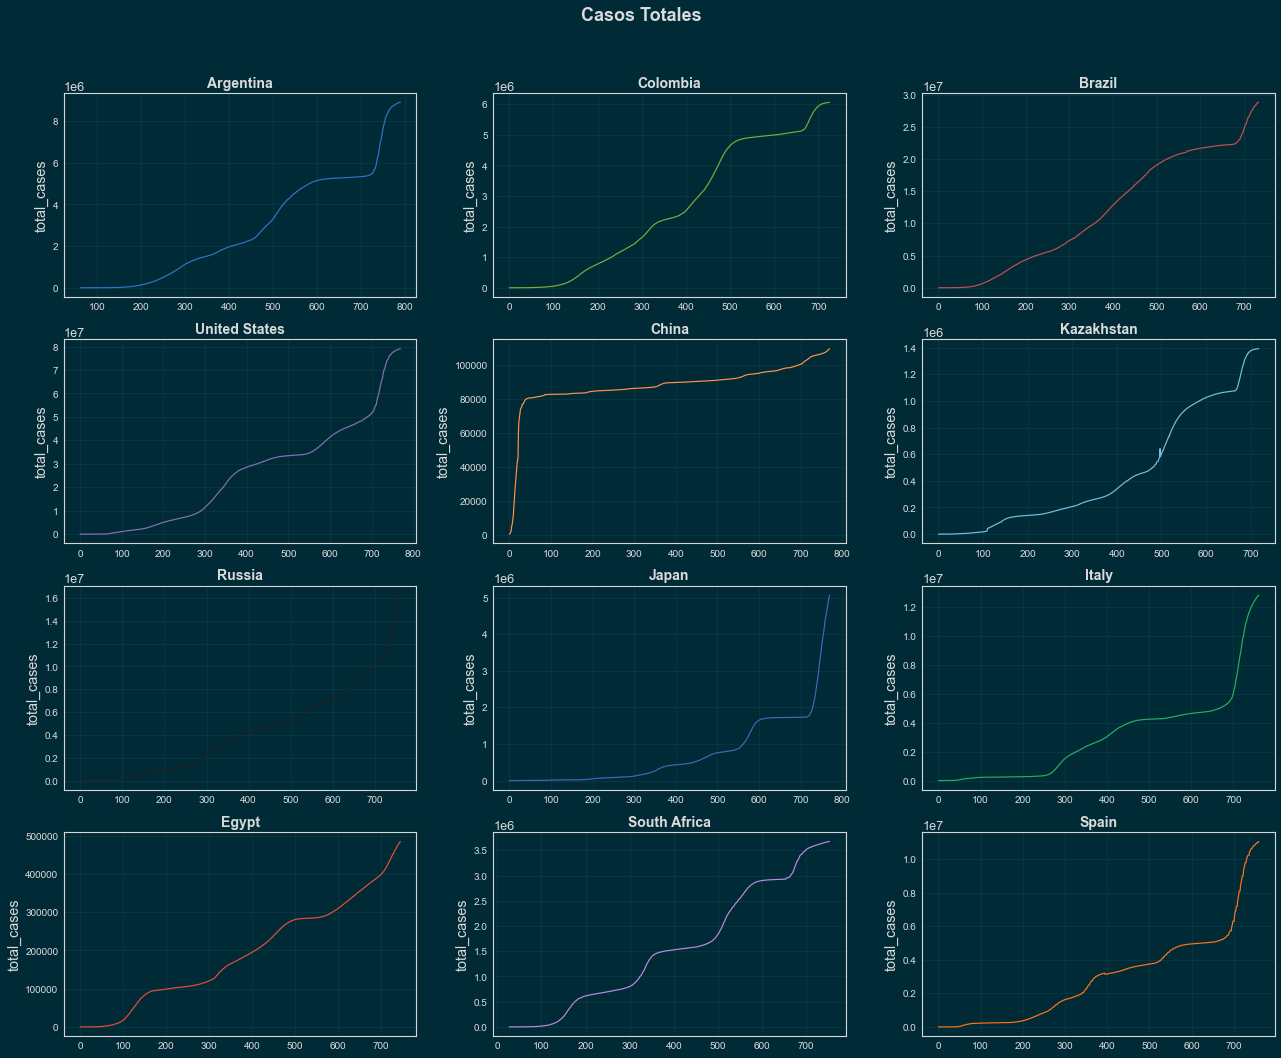

In [7]:
#seleccionamos China
#sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 15))
axes = axes.flat

Paises = ['Argentina','Colombia','Brazil','United States',
          'China',
          'Kazakhstan',
          'Russia',
          'Japan',
          'Italy',
          'Egypt',
          'South Africa',
          'Spain'
          #,'India'
         ]

for j,p in enumerate(Paises):
    ind_arg=np.where(paises==p)
    ind_arg=ind_arg[0]
    casos_arg=confirmados[ind_arg]
    dias=np.arange(0,len(casos_arg))
    #plt.figure(figsize = (15,8))
    #plt.plot(dias,casos_arg)
    #plt.xlabel('dias')
    #plt.ylabel('cantidad de casos')
    sns.lineplot(x=dias, y=casos_arg,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[j]["color"],
        #markers=True,
        #dashes=True,
        #legend="full",
        alpha   = 1.0, ax = axes[j])
    axes[j].set_title(f'{p}', fontsize = 14, fontweight = "bold")
    axes[j].tick_params(labelsize = 10)
    axes[j].tick_params(labelsize = 10)
    axes[j].set_xlabel("")
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Casos Totales', fontsize = 18, fontweight = "bold")

Esta es la curva de **casos totales** de la Argentina. Aquí no se ven las olas, ya que estas se ven en la curva de casos confirmados por día, es decir, de casos nuevos. Esta habla de los acumulados, entonces siempre se agregan.

Para ver mejor la curva, podemos tomar el logartimo de los datos. Una curva exponencial se ve lineal en escala logarítmica


Text(0.5, 0.98, 'log cantidad de casos')

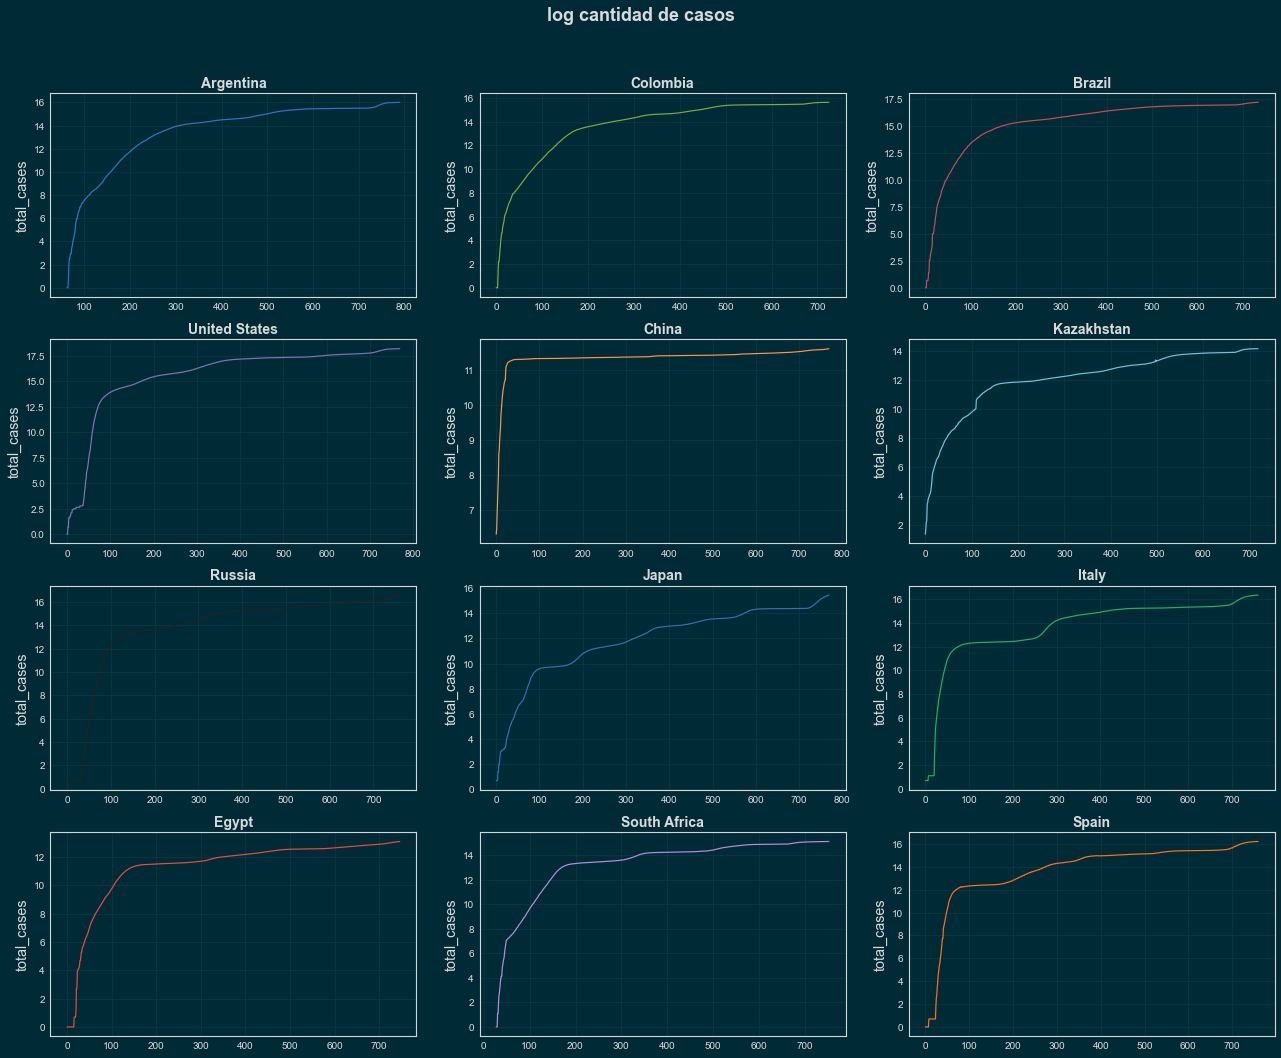

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 15))
axes = axes.flat

for j,p in enumerate(Paises):
    ind_arg=np.where(paises==p)
    ind_arg=ind_arg[0]
    casos_arg=confirmados[ind_arg]
    dias=np.arange(0,len(casos_arg))
    #plt.figure(figsize = (15,8))
    #plt.plot(dias,casos_arg)
    #plt.xlabel('dias')
    #plt.ylabel('cantidad de casos')
    sns.lineplot(x=dias, y=np.log(casos_arg),
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[j]["color"],
        #line_kws= {'linewidth': 2},
        alpha   = 1.0, ax = axes[j])
    axes[j].set_title(f'{p}', fontsize = 14, fontweight = "bold")
    axes[j].tick_params(labelsize = 10)
    axes[j].tick_params(labelsize = 10)
    axes[j].set_xlabel("")
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('log cantidad de casos', fontsize = 18, fontweight = "bold")

Veamos lo que pasa en los primeros 60 días desde que se detectó el primer caso en Argentina, para ver cómo fue el $k$ inicial

In [28]:
#['Argentina','Colombia','Brazil','United States',
#          'China',
#          'Kazakhstan',
#          'Russia',
#          'Japan',
#          'Italy',
#          'Egypt',
#          'South Africa',
#          'Spain'
#          #,'India'
#         ]
df = datos[datos.location == 'Argentina']
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
5822,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
5823,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
5824,ARG,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
5825,ARG,South America,Argentina,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
5826,ARG,South America,Argentina,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6608,ARG,South America,Argentina,2022-02-25,8887973.0,9487.0,10389.429,125958.0,86.0,128.000,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6609,ARG,South America,Argentina,2022-02-26,8893568.0,5595.0,10073.429,126048.0,90.0,123.286,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6610,ARG,South America,Argentina,2022-02-27,8897178.0,3610.0,9953.429,126120.0,72.0,120.286,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6611,ARG,South America,Argentina,2022-02-28,8900656.0,3478.0,8854.571,126152.0,32.0,100.143,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN


In [96]:
ind_arg=np.where(paises=='Argentina')
ind_arg=ind_arg[0]
casos_arg=confirmados[ind_arg]
dias=np.arange(0,len(casos_arg))


In [94]:
for j,p in enumerate(Paises):
    df = datos[datos.location == p]
    print(df.total_cases.isnull().idxmin()-df.iloc[0].name)

62
0
0
0
0
0
0
0
0
0
0
0


De estos paises argentina presenta un desface de 62 dias en el reporte del primer caso.

Text(0.5, 0.98, 'Cantidad de casos primeros 60 días')

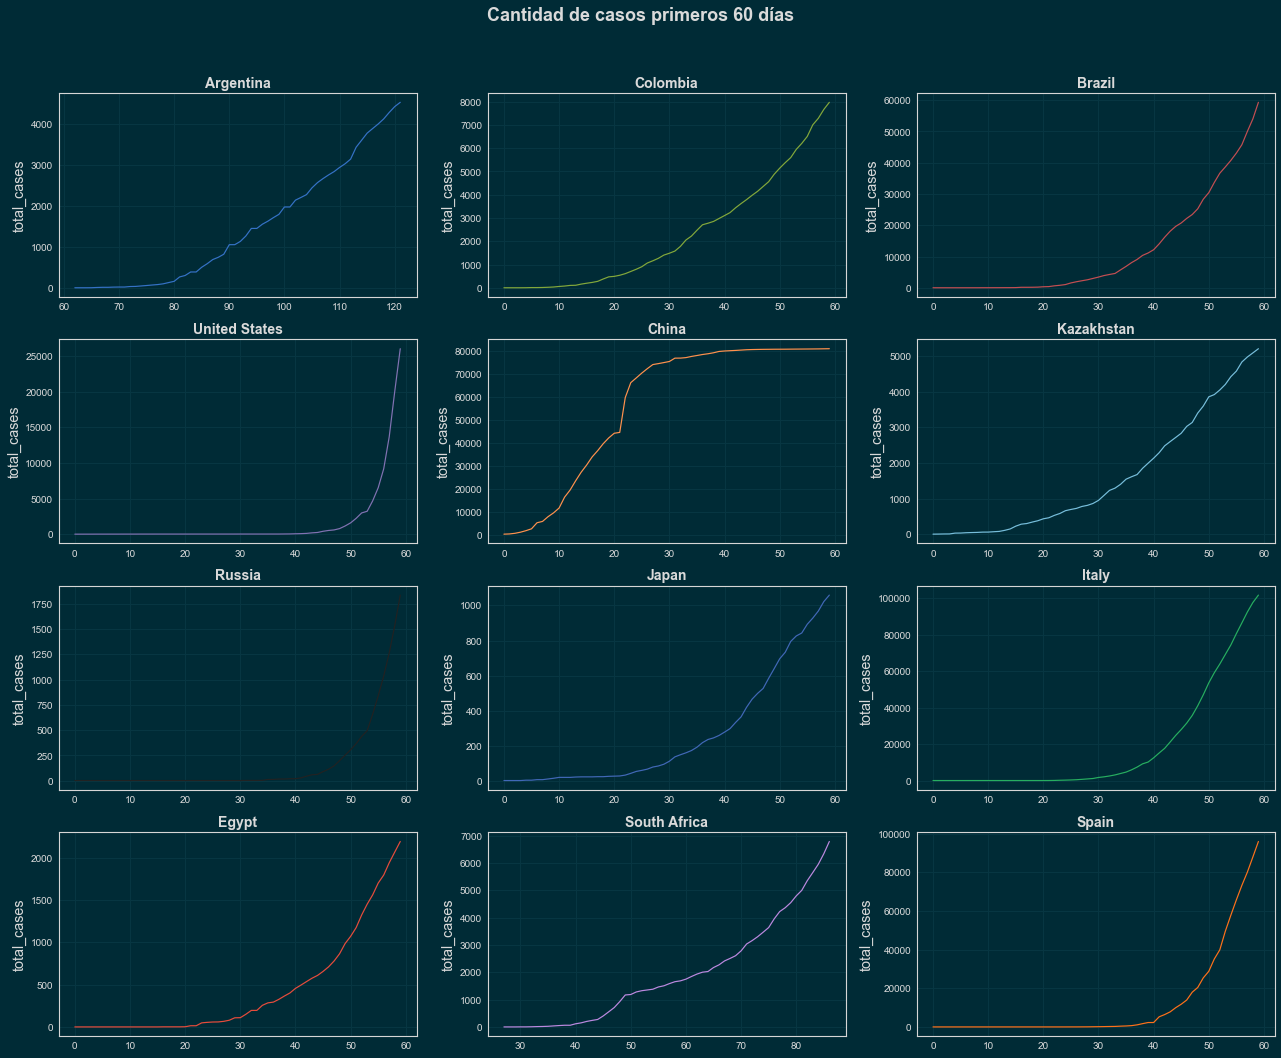

In [34]:
#primeros 60 días

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 15))
axes = axes.flat

for j,p in enumerate(Paises):
    ind_p=np.where(paises==p)
    ind_p=ind_p[0]
    casos_p=confirmados[ind_p]
    dias=np.arange(0,len(casos_p))
    
    df = datos[datos.location == p]
    l_i=df.total_cases.isnull().idxmin()-df.iloc[0].name
    casos_principio=casos_p[l_i:l_i+60]
    dias_principio=dias[l_i:l_i+60]
    
    sns.lineplot(x=dias_principio, y=casos_principio,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[j]["color"],
        #line_kws= {'linewidth': 2},
        alpha   = 1.0, ax = axes[j])
    axes[j].set_title(f'{p}', fontsize = 14, fontweight = "bold")
    axes[j].tick_params(labelsize = 10)
    axes[j].tick_params(labelsize = 10)
    axes[j].set_xlabel("")
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Cantidad de casos primeros 60 días', fontsize = 18, fontweight = "bold")

Es difícil determinar si esta parte es exponencial. Analicemos qué pasa en escala logarítmica.

Text(0, 0.5, 'log cantidad de casos')

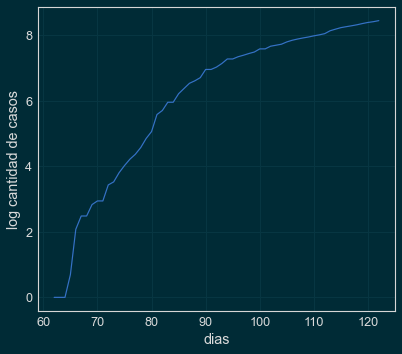

In [86]:

plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

Text(0.5, 0.98, 'log cantidad de casos primeros 60 días')

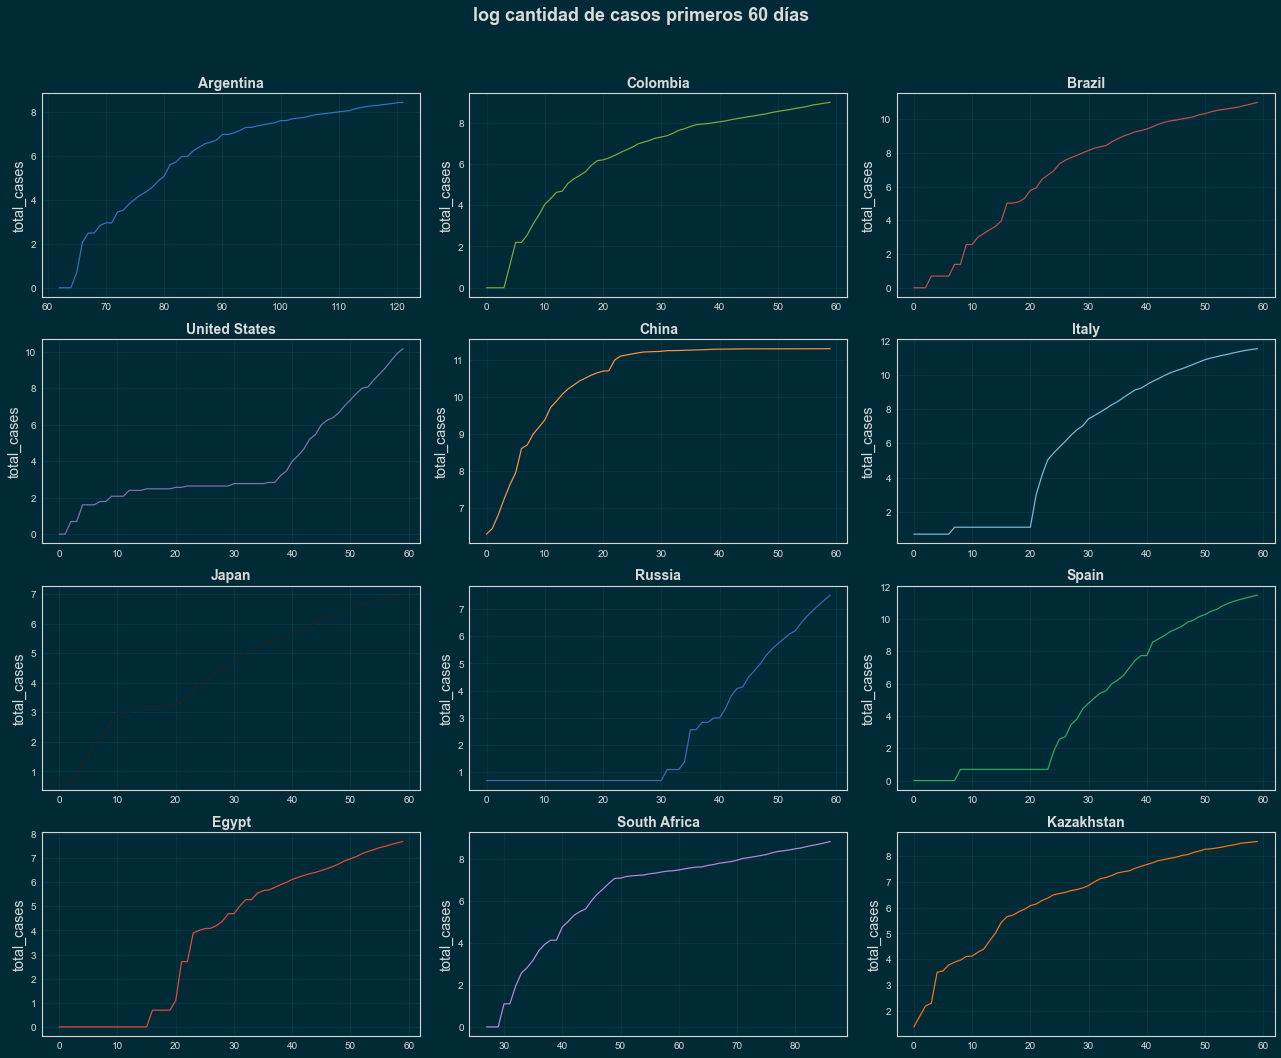

In [127]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 15))
axes = axes.flat

for j,p in enumerate(Paises):
    ind_arg=np.where(paises==p)
    ind_arg=ind_arg[0]
    casos_arg=confirmados[ind_arg]
    dias=np.arange(0,len(casos_arg))
    
    df = datos[datos.location == p]
    l_i=df.total_cases.isnull().idxmin()-df.iloc[0].name
    casos_principio=casos_arg[l_i:l_i+60]
    dias_principio=dias[l_i:l_i+60]
    
    sns.lineplot(x=dias_principio, y=np.log(casos_principio),
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[j]["color"],
        #line_kws= {'linewidth': 2},
        alpha   = 1.0, ax = axes[j])
    axes[j].set_title(f'{p}', fontsize = 14, fontweight = "bold")
    axes[j].tick_params(labelsize = 10)
    axes[j].tick_params(labelsize = 10)
    axes[j].set_xlabel("")
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('log cantidad de casos primeros 60 días', fontsize = 18, fontweight = "bold")

Text(0, 0.5, 'cantidad de casos')

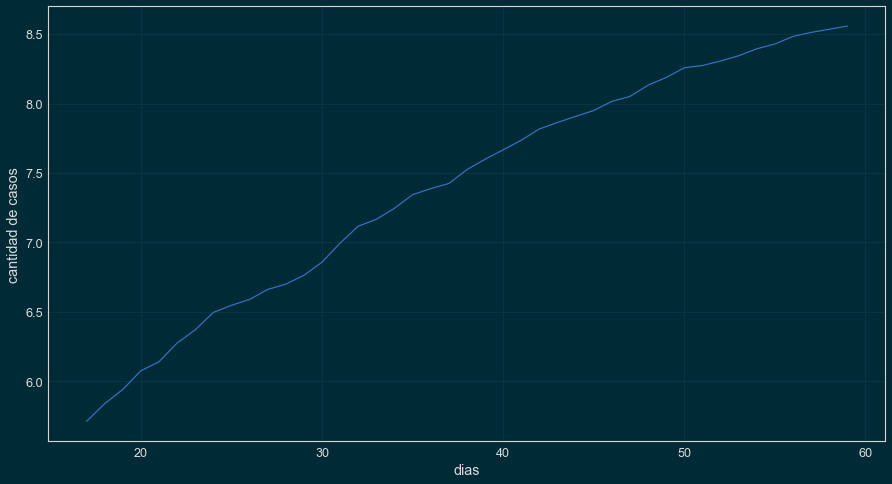

In [72]:
ind_p=np.where(paises=='Kazakhstan')
ind_p=ind_p[0]
casos_p=confirmados[ind_p]
dias=np.arange(0,len(casos_p))
    
#df = datos[datos.location == p]
#l_i=df.total_cases.isnull().idxmin()-df.iloc[0].name

casos_principio=casos_p[17:60]
dias_principio=dias[17:60]

#casos_principio=casos_arg[60:95]
#dias_principio=dias[60:95]

plt.figure(figsize = (15,8))
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

In [ ]:
limites_i = [62,36,44,37,0,30,32,45,29,36,49,17]
limites_s = [90,60,60,60,15,50,52,60,39,60,60,60]

Text(0.5, 0.98, 'log cantidad de casos primeros 60 días')

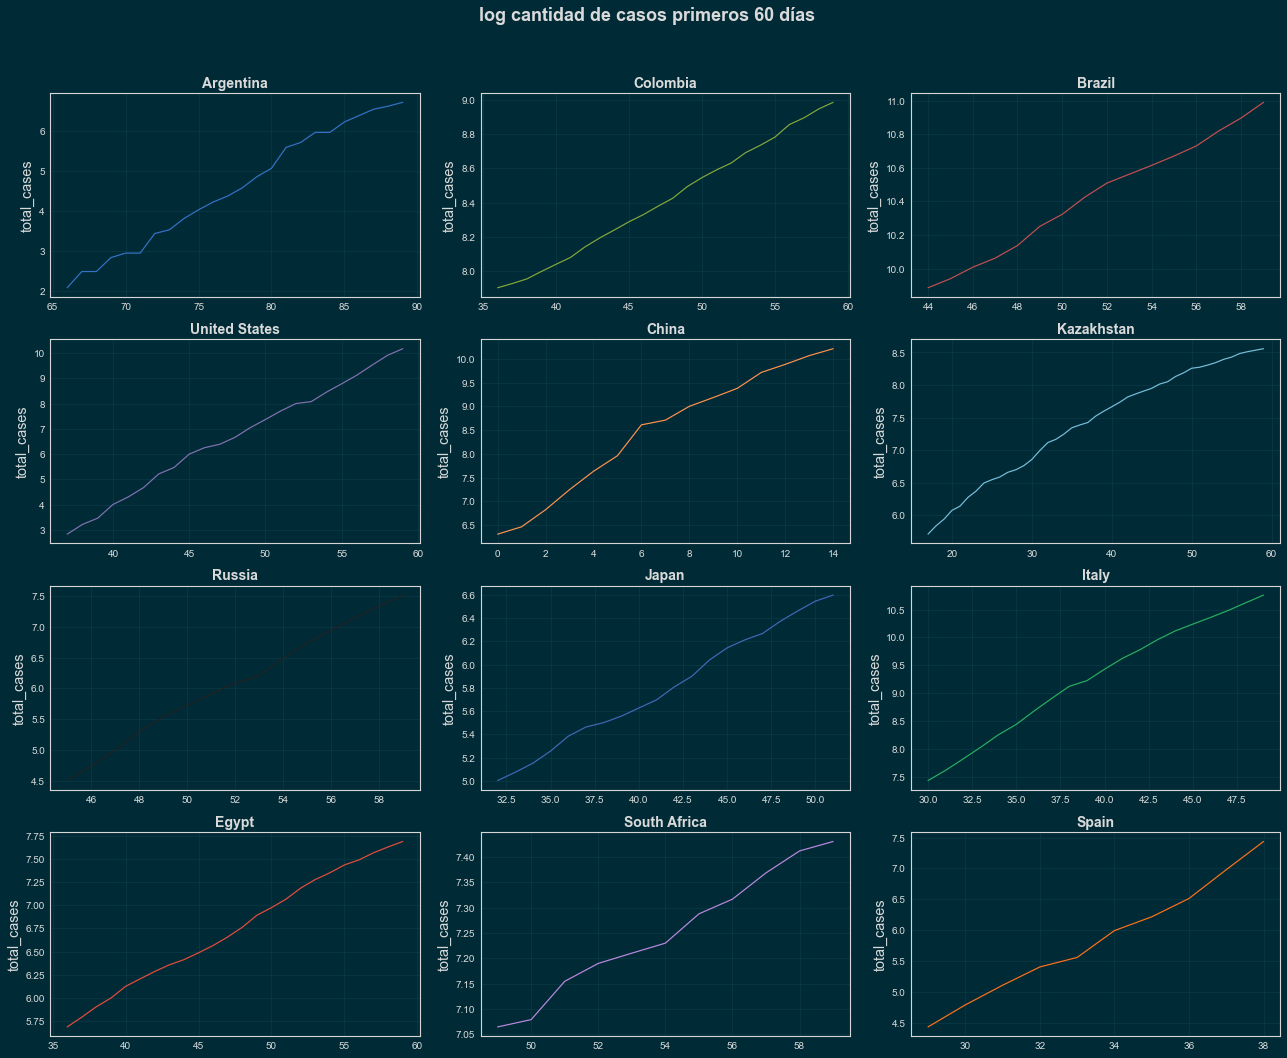

In [74]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 15))
axes = axes.flat

#limites_i = [66,36,44,37,0,30,32,45,29,36,49,17]
limites_i = [66,36,44,37,0,17,45,32,30,36,49,29]
#limites_s = [90,60,60,60,15,50,52,60,39,60,60,60]
limites_s = [90,60,60,60,15,60,60,52,50,60,60,39]
for j,p in enumerate(Paises):
    ind_arg=np.where(paises==p)
    ind_arg=ind_arg[0]
    casos_arg=confirmados[ind_arg]
    dias=np.arange(0,len(casos_arg))
    
    #df = datos[datos.location == p]
    #l_i=df.total_cases.isnull().idxmin()-df.iloc[0].name
    casos_principio=casos_arg[limites_i[j]:limites_s[j]]
    dias_principio=dias[limites_i[j]:limites_s[j]]
    
    sns.lineplot(x=dias_principio, y=np.log(casos_principio),
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[j]["color"],
        #line_kws= {'linewidth': 2},
        alpha   = 1.0, ax = axes[j])
    axes[j].set_title(f'{p}', fontsize = 14, fontweight = "bold")
    axes[j].tick_params(labelsize = 10)
    axes[j].tick_params(labelsize = 10)
    axes[j].set_xlabel("")
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('log cantidad de casos primeros 60 días', fontsize = 18, fontweight = "bold")

Mejor nos quedamos con lo que sucede entre los días 31 y 55, ya que ese fue el comportamiento más sostenido.

Text(0, 0.5, 'cantidad de casos')

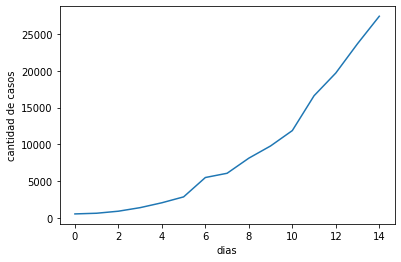

In [29]:
casos_principio=casos_arg[0:15]
dias_principio=dias[0:15]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'log cantidad de casos')

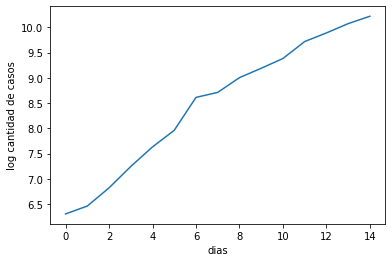

In [30]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

¡Se ve bastante lineal! Aprovechemos esto para averiguar el $k$ utilizando un ajuste hecho con el método de cuadrados mínimos, ajustando los datos al modelo 

$Confirmados=e^{k(t-t_0)}$



In [75]:
#definimos función para ajustar modelo
def exponencial(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

In [36]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)
popt

array([  0.22129053, -32.43131734])

In [78]:
limites_i = [66,36,44,37,0,17,45,32,30,36,49,29]

limites_s = [90,60,60,60,15,60,60,52,50,60,60,39]
t_0 = []
k = []
for j,p in enumerate(Paises):
    ind_arg=np.where(paises==p)
    ind_arg=ind_arg[0]
    casos_arg=confirmados[ind_arg]
    dias=np.arange(0,len(casos_arg))
    
    #df = datos[datos.location == p]
    #l_i=df.total_cases.isnull().idxmin()-df.iloc[0].name
    casos_principio=casos_arg[limites_i[j]:limites_s[j]]
    dias_principio=dias[limites_i[j]:limites_s[j]]
    
    popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)
    t_0.append(popt[1])
    k.append(popt[0])
    print(p,'---->',popt)
    print('-----------------')

Argentina ----> [ 0.16878135 48.72092654]
-----------------
Colombia ----> [ 4.95563666e-02 -1.22354700e+02]
-----------------
Brazil ----> [ 7.32928309e-02 -9.07793596e+01]
-----------------
United States ----> [ 0.33415297 28.52062263]
-----------------
China ----> [  0.22129053 -32.43131734]
-----------------
Kazakhstan ----> [ 5.50773346e-02 -9.81467198e+01]
-----------------
Russia ----> [ 0.20494797 22.24987856]
-----------------
Japan ----> [  0.08609519 -25.89967537]
-----------------
Italy ----> [  0.15034704 -22.75494327]
-----------------
Egypt ----> [  0.08531393 -31.68170456]
-----------------
South Africa ----> [ 3.75448551e-02 -1.39085973e+02]
-----------------
Spain ----> [ 0.38217794 18.63172985]
-----------------


Veamos cómo se ajusta lo que obtuvimos a los datos reales

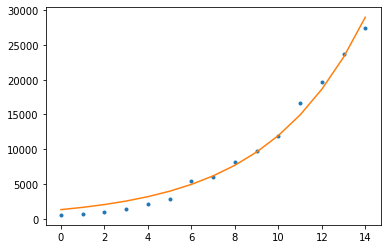

In [37]:
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

Text(0.5, 0.98, 'log cantidad de casos primeros 60 días')

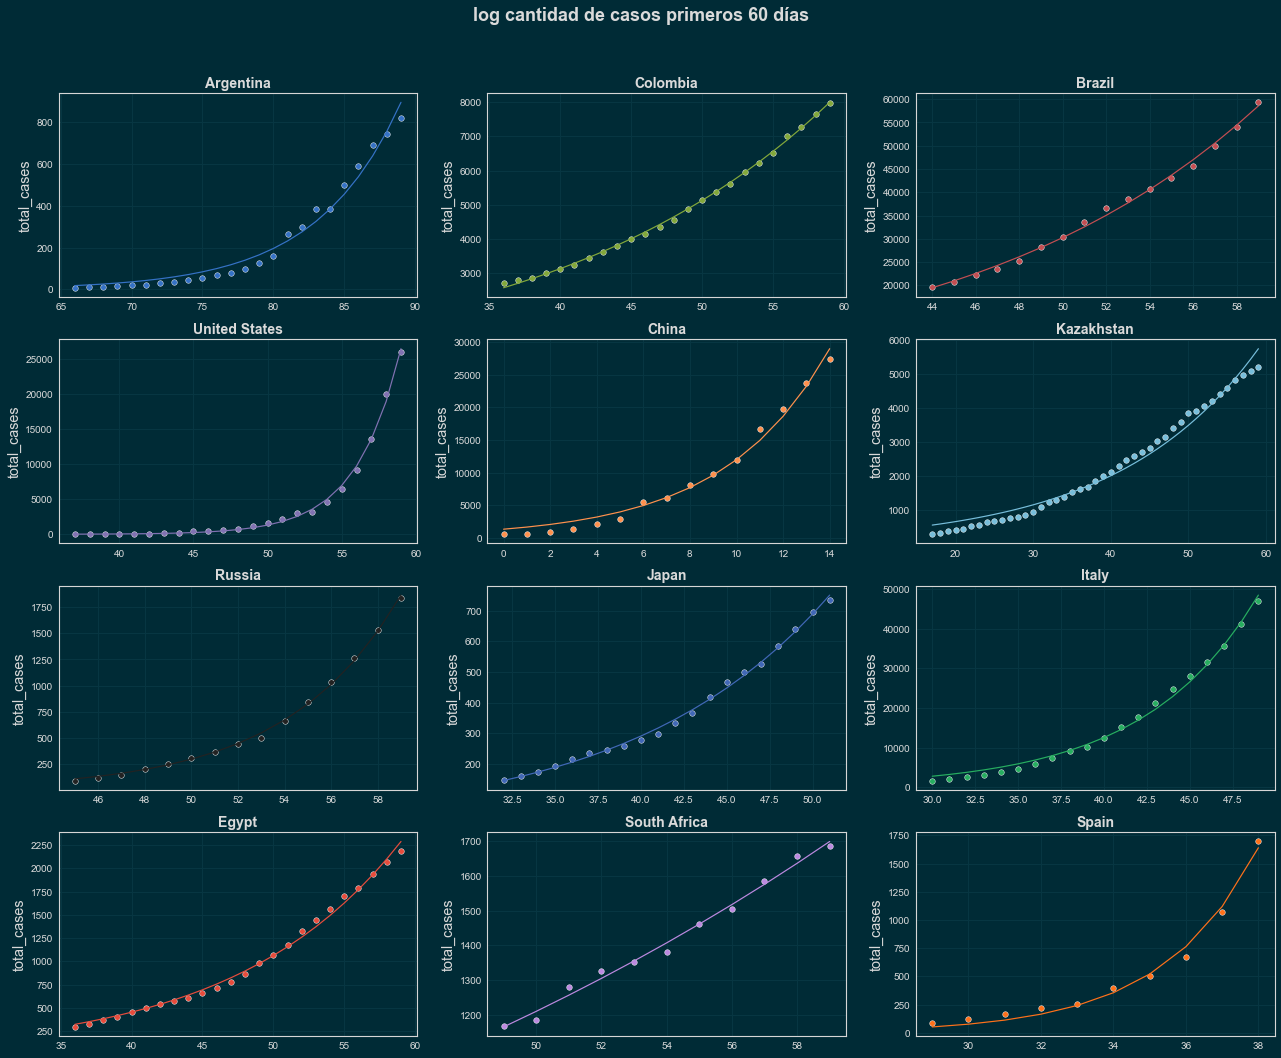

In [90]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 15))
axes = axes.flat

#limites_i = [66,36,44,37,0,30,32,45,29,36,49,17]
limites_i = [66,36,44,37,0,17,45,32,30,36,49,29]
#limites_s = [90,60,60,60,15,50,52,60,39,60,60,60]
limites_s = [90,60,60,60,15,60,60,52,50,60,60,39]
for j,p in enumerate(Paises):
    ind_arg=np.where(paises==p)
    ind_arg=ind_arg[0]
    casos_arg=confirmados[ind_arg]
    dias=np.arange(0,len(casos_arg))
    
    #df = datos[datos.location == p]
    #l_i=df.total_cases.isnull().idxmin()-df.iloc[0].name
    casos_principio=casos_arg[limites_i[j]:limites_s[j]]
    dias_principio=dias[limites_i[j]:limites_s[j]]
    
    casos_simu=exponencial(dias_principio,k[j],t_0[j])
    sns.scatterplot(x=dias_principio, y=casos_principio,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[j]["color"],
        #line_kws= {'linewidth': 2},
        alpha   = 1.0, ax = axes[j])
    sns.lineplot(x=dias_principio, y=casos_simu,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[j]["color"],
        #line_kws= {'linewidth': 2},
        alpha   = 1.0, ax = axes[j])
    axes[j].set_title(f'{p}', fontsize = 14, fontweight = "bold")
    axes[j].tick_params(labelsize = 10)
    axes[j].tick_params(labelsize = 10)
    axes[j].set_xlabel("")
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('log cantidad de casos primeros 60 días', fontsize = 18, fontweight = "bold")

Como última pista, hagamos una función que determine los casos nuevos por día a partir de estas curvas. Puede ser útil para tu análisis.

In [38]:
def casos_nuevos(casos):
  nuevos=np.zeros(len(casos))
  i=0
  while i<len(nuevos)-1:
    nuevos[i]=casos[i+1]-casos[i]
    i=i+1

  return nuevos   

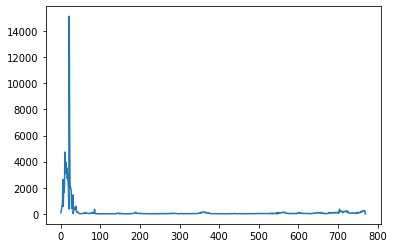

In [39]:
casos_arg=np.array(casos_arg)
nuevos_arg=casos_nuevos(casos_arg)
plt.plot(nuevos_arg)

## Mongolia

In [43]:
df_mon = datos[datos.location == 'Mongolia']
df_mon

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
100110,MNG,Asia,Mongolia,2020-03-10,1.0,1.0,NaN,NaN,NaN,NaN,...,5.5,46.5,71.18,7.0,69.87,0.737,NaN,NaN,NaN,NaN
100111,MNG,Asia,Mongolia,2020-03-11,1.0,0.0,NaN,NaN,NaN,NaN,...,5.5,46.5,71.18,7.0,69.87,0.737,NaN,NaN,NaN,NaN
100112,MNG,Asia,Mongolia,2020-03-12,1.0,0.0,NaN,NaN,NaN,NaN,...,5.5,46.5,71.18,7.0,69.87,0.737,NaN,NaN,NaN,NaN
100113,MNG,Asia,Mongolia,2020-03-13,1.0,0.0,NaN,NaN,NaN,NaN,...,5.5,46.5,71.18,7.0,69.87,0.737,NaN,NaN,NaN,NaN
100114,MNG,Asia,Mongolia,2020-03-14,1.0,0.0,NaN,NaN,NaN,NaN,...,5.5,46.5,71.18,7.0,69.87,0.737,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100827,MNG,Asia,Mongolia,2022-02-25,905968.0,1737.0,1749.571,2167.0,0.0,1.429,...,5.5,46.5,71.18,7.0,69.87,0.737,NaN,NaN,NaN,NaN
100828,MNG,Asia,Mongolia,2022-02-26,905968.0,0.0,1749.571,2168.0,1.0,1.286,...,5.5,46.5,71.18,7.0,69.87,0.737,NaN,NaN,NaN,NaN
100829,MNG,Asia,Mongolia,2022-02-27,905968.0,0.0,1749.571,2168.0,0.0,1.286,...,5.5,46.5,71.18,7.0,69.87,0.737,NaN,NaN,NaN,NaN
100830,MNG,Asia,Mongolia,2022-02-28,908157.0,2189.0,1307.857,2170.0,2.0,1.571,...,5.5,46.5,71.18,7.0,69.87,0.737,NaN,NaN,NaN,NaN


In [44]:
# Primer caso no nulo index
df_mon.total_cases.isnull().idxmin()-df_mon.iloc[0].name

0

Text(0, 0.5, 'cantidad de casos')

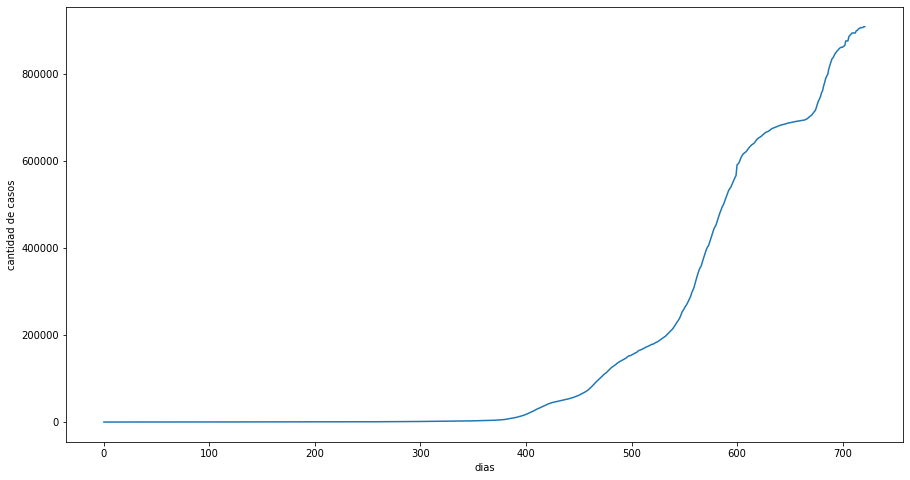

In [45]:
#seleccionamos Mongolia

ind_arg=np.where(paises=='Mongolia')
ind_arg=ind_arg[0]
casos_arg=confirmados[ind_arg]
dias=np.arange(0,len(casos_arg))
plt.figure(figsize = (15,8))
plt.plot(dias,casos_arg)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'log cantidad de casos')

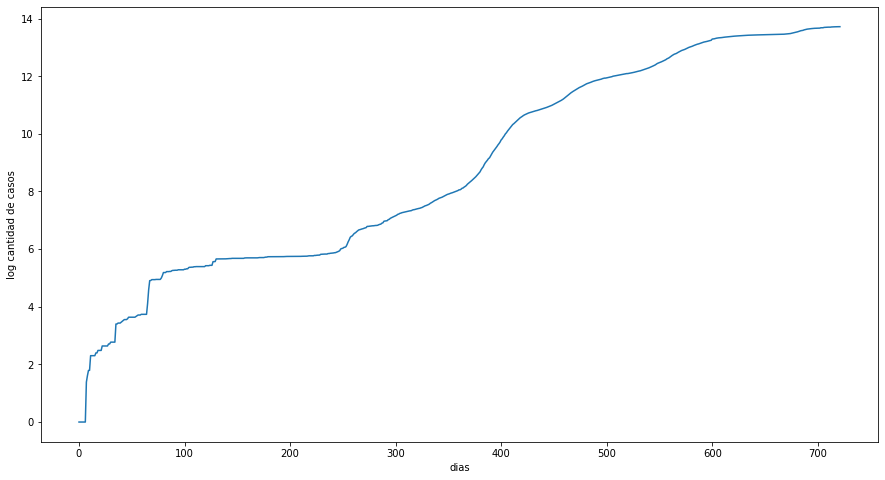

In [46]:
plt.figure(figsize = (15,8))
plt.plot(dias,np.log(casos_arg))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

Text(0, 0.5, 'cantidad de casos')

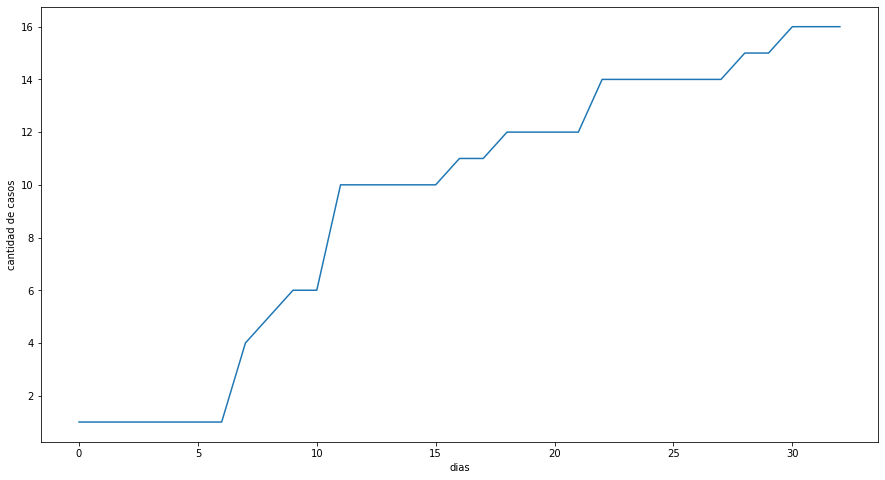

In [49]:
casos_principio=casos_arg[0:33]
dias_principio=dias[0:33]

plt.figure(figsize = (15,8))
plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'log cantidad de casos')

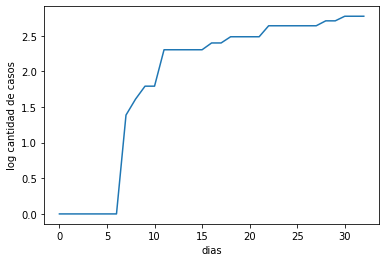

In [50]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

Text(0, 0.5, 'cantidad de casos')

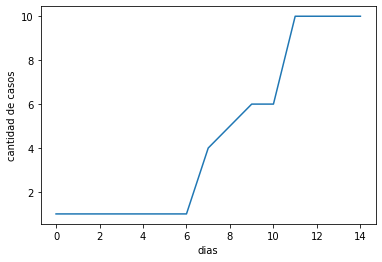

In [51]:
casos_principio=casos_arg[0:15]
dias_principio=dias[0:15]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'log cantidad de casos')

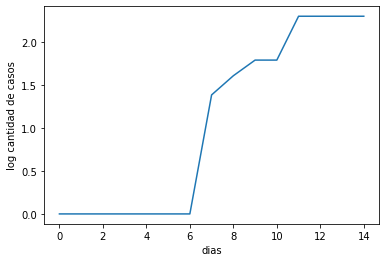

In [52]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

In [53]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)
popt

array([ 0.17402402, -0.32631215])

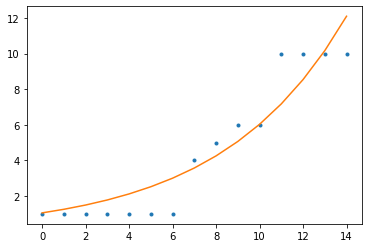

In [54]:

k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

## Colombia

In [6]:
df_col = datos[datos.location == 'Colombia']
df_col

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
32128,COL,South America,Colombia,2020-03-06,1.0,1.0,NaN,NaN,NaN,NaN,...,4.7,13.5,65.386,1.71,77.29,0.767,NaN,NaN,NaN,NaN
32129,COL,South America,Colombia,2020-03-07,1.0,0.0,NaN,NaN,NaN,NaN,...,4.7,13.5,65.386,1.71,77.29,0.767,NaN,NaN,NaN,NaN
32130,COL,South America,Colombia,2020-03-08,1.0,0.0,NaN,NaN,NaN,NaN,...,4.7,13.5,65.386,1.71,77.29,0.767,543.2,1.15,-1.48,10.595749
32131,COL,South America,Colombia,2020-03-09,1.0,0.0,NaN,NaN,NaN,NaN,...,4.7,13.5,65.386,1.71,77.29,0.767,NaN,NaN,NaN,NaN
32132,COL,South America,Colombia,2020-03-10,3.0,2.0,NaN,NaN,NaN,NaN,...,4.7,13.5,65.386,1.71,77.29,0.767,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32849,COL,South America,Colombia,2022-02-25,6058715.0,2159.0,2793.143,138501.0,80.0,90.286,...,4.7,13.5,65.386,1.71,77.29,0.767,NaN,NaN,NaN,NaN
32850,COL,South America,Colombia,2022-02-26,6060793.0,2078.0,2447.429,138598.0,97.0,86.000,...,4.7,13.5,65.386,1.71,77.29,0.767,NaN,NaN,NaN,NaN
32851,COL,South America,Colombia,2022-02-27,6062701.0,1908.0,2237.000,138693.0,95.0,83.857,...,4.7,13.5,65.386,1.71,77.29,0.767,NaN,NaN,NaN,NaN
32852,COL,South America,Colombia,2022-02-28,6064583.0,1882.0,2090.143,138767.0,74.0,80.286,...,4.7,13.5,65.386,1.71,77.29,0.767,NaN,NaN,NaN,NaN


In [8]:
# Primer caso no nulo index
df_col.total_cases.isnull().idxmin()-df_col.iloc[0].name

0

In [9]:
paises=datos['location'] #cargo el vector de paises
confirmados=datos['total_cases'] #carga vector todos los casos confirmados

Text(0, 0.5, 'cantidad de casos')

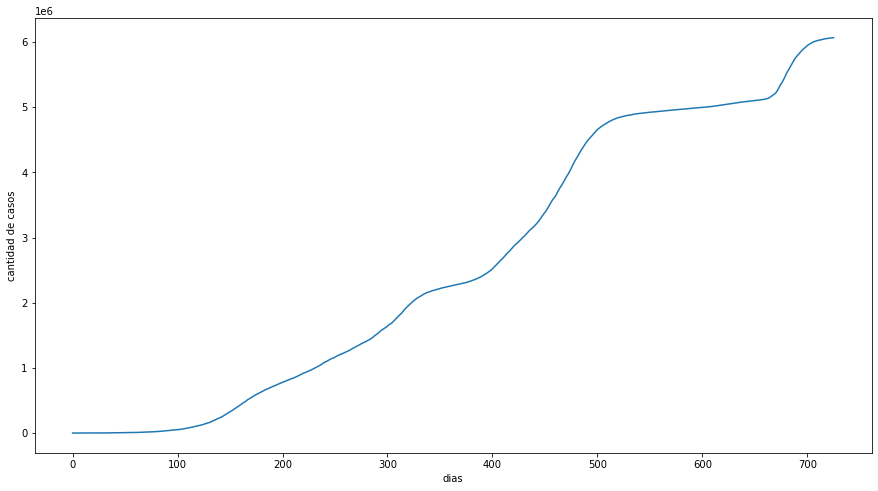

In [10]:
#seleccionamos China

ind_arg=np.where(paises=='Colombia')
ind_arg=ind_arg[0]
casos_arg=confirmados[ind_arg]
dias=np.arange(0,len(casos_arg))
plt.figure(figsize = (15,8))
plt.plot(dias,casos_arg)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'log cantidad de casos')

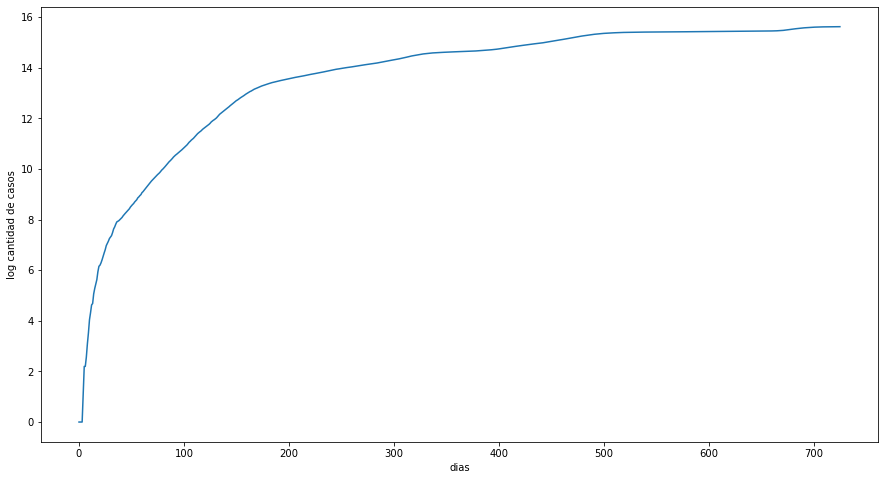

In [11]:
plt.figure(figsize = (15,8))
plt.plot(dias,np.log(casos_arg))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

In [ ]:
casos_principio=casos_arg[0:60]
dias_principio=dias[0:60]

plt.figure(figsize = (15,8))
plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')